# Notebook description

I will be performing sentiment analysis on the Thomas Cup 2022 Badminton tweets.

**Sentiment Analysis:**  is simply  defined as the process of extracting an author’s **emotional intent** from text. This can take a lot of forms, from simple “positive and negative” feelings to specific emotions like “surprised” or “angry.”
The emotion that an author tries to convey in a piece of writing is often important metadata. Sentiment analysis is important because it unlocks the emotions from messy text data into a structured form that is easy to analyze and quantify.
In some cases sentiment analysis is merely the comparison between the author’s text and the predefined subjectivity lexicon and thats what we are going to do. Then make visuals you  based on  the subjectivity lexicons compared to the tweets.

**A subjectivity lexicon** is a predefined list of words associated with a specific emotion or positive or negative feelings.

We are going to use the following  subjectivity lexicon:
 *  The **bing** lexicon;  which contains words classified as “positive” or “negative”.
 
 
Let's first review the 6 steps of text mining workflow since sentiment analyses  are techniques aligning to **feature extraction(step 4)** in this workflow.

**Text mining workflow**
1. Defining the problem and specifing the goal.
2. Identifying the text to be analyzed.
3. Organizing / cleaning the text / pre-processing the text.
4. Extracting features about the text. This is the step in which we examine the sentiment and polarity of the text.
5. Analyzing ; visualizing etc.
6. Drawing conclusion / reaching an insight.

**Let's get started !!**







# Loading libraries



In [1]:
# reading in the libraries we're going to use
library(tidyverse) # general utility & workflow functions
library(tidytext) # tidy implimentation of NLP methods
# Installing qdap inorder to use the polarity function; qdap (Quantitative Discourse Analysis Package) is an R package designed to assist in quantitative discourse analysis.
install.packages("qdap")
library(qdap)

library(tm)

library(ggthemes) # themes

library(wordcloud)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘openNLPdata’, ‘rJava’, ‘openNLP’, ‘venneuler’


Loading required package: qdapDictionaries

Loading required package: qdapRegex


Attaching package: ‘qdapRegex’


The following object is masked from ‘package:dplyr’:

    explain


The following object is masked from ‘package:ggplot2’:

    %+%


Loading required package: qdapTools


Attaching package: ‘qdapTools’


The following object is masked from ‘package:dplyr’:

    id


Loading required package: RColorBrewer


Attaching package: ‘qdap’

# 2.  Importing the data / Identifying the text source

In [2]:
# reading in our data
Badminton_tweets <- read_csv("../input/thomas-cup-2022-badminton-tweets/thomascup_2022_tweets.csv", show_col_types = FALSE)

# Looking at the first observations
head(Badminton_tweets, n = 3)

# summary of the data
summary(Badminton_tweets)



id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
<dbl>,<chr>,<chr>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<chr>
1.529235e+18,"India has won the Thomas cup, @nikhat_zareen won the gold. @vishy64theking ended up joint 2nd with 0.5 points behind in Super bet. @rpragchess has beat World no.1 Magnus and fighting World No. 2 Ding to clinch the title. Is IPL still a tournament to watch? #India #IndianEra",themohanty_,"['India', 'IndianEra']",2022-05-24 22:58:24,43,0,0,3,0,en,NA,NA,NA,"India has won the Thomas cup, @nikhat_zareen won the gold. @vishy64theking ended up joint 2nd with 0.5 points behind in Super bet. @rpragchess has beat World no.1 Magnus and fighting World No. 2 Ding to clinch the title. Is IPL still a tournament to watch? #India #IndianEra"
1.528225e+18,PM’s interaction with Thomas Cup Champions is amazing. Simple yet inspirational &amp; satisfying. Congratulations #India !! Every players story is beautiful and PM’s personalised interaction is stunning #ThomasCup @BadmintonIndia @PMOIndia @narendramodi,goikarpk,"['India', 'ThomasCup']",2022-05-22 04:03:15,51,0,0,1,0,en,NA,NA,NA,PM’s interaction with Thomas Cup Champions is amazing. Simple yet inspirational &amp; satisfying. Congratulations #India !! Every players story is beautiful and PM’s personalised interaction is stunning #ThomasCup @BadmintonIndia @PMOIndia @narendramodi
1.527217e+18,India won maiden Thomas Cup after defeating 14-time champion Indonesia! Proud Indian Moment🇮🇳 India registered a 3-0 victory over 14-time champions Indonesia. This is India's first-ever Thomas Cup victory in 73 years. #ThomasCup #India #ThomasUberCup2022,BeShararat,"['ThomasCup', 'India', 'ThomasUberCup2022']",2022-05-19 09:17:53,4,0,1,1,0,en,NA,NA,NA,India won maiden Thomas Cup after defeating 14-time champion Indonesia! Proud Indian Moment🇮🇳 India registered a 3-0 victory over 14-time champions Indonesia. This is India's first-ever Thomas Cup victory in 73 years. #ThomasCup #India #ThomasUberCup2022


       id                text             username           hashtags        
 Min.   :1.478e+18   Length:9704        Length:9704        Length:9704       
 1st Qu.:1.525e+18   Class :character   Class :character   Class :character  
 Median :1.526e+18   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1.525e+18                                                           
 3rd Qu.:1.526e+18                                                           
 Max.   :1.538e+18                                                           
                                                                             
   created_at                  user followers count   replycount     
 Min.   :2022-01-02 07:22:39   Min.   :       0     Min.   :   0.00  
 1st Qu.:2022-05-13 16:24:26   1st Qu.:      42     1st Qu.:   0.00  
 Median :2022-05-15 09:46:21   Median :     201     Median :   0.00  
 Mean   :2022-05-14 10:00:22   Mean   :   29770     Mean   :   2.63  
 3rd Qu.:2022-05-15 10:24:

In [3]:
# Structure
str(Badminton_tweets)



spec_tbl_df [9,704 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                  : num [1:9704] 1.53e+18 1.53e+18 1.53e+18 1.53e+18 1.53e+18 ...
 $ text                : chr [1:9704] "India has won the Thomas cup,  @nikhat_zareen won the gold. @vishy64theking ended up joint 2nd with 0.5 points "| __truncated__ "PM’s interaction with Thomas Cup Champions is amazing. Simple yet inspirational &amp; satisfying. Congratulatio"| __truncated__ "India won maiden Thomas Cup after defeating 14-time champion Indonesia! Proud Indian Moment🇮🇳\nIndia registered"| __truncated__ "#India's bunch of exceptionally proficient #Badminton players lifted the #ThomasCup2022 at #Bangkok on Sun,May1"| __truncated__ ...
 $ username            : chr [1:9704] "themohanty_" "goikarpk" "BeShararat" "aaiprayagraj" ...
 $ hashtags            : chr [1:9704] "['India', 'IndianEra']" "['India', 'ThomasCup']" "['ThomasCup', 'India', 'ThomasUberCup2022']" "['India', 'Badminton', 'ThomasCup2022', 'Bangkok', 'Indonesi

# Examining the basic polarity

When starting a sentiment project, sometimes a quick qdap's **polarity()** will help us set expectations or learn about the problem. Polarity can help use get familiar with your data.

Warning message in polarity(Badminton_tweets$text):
“
  Some rows contain double punctuation.  Suggested use of `sentSplit` function.”


all,wc,polarity,pos.words,neg.words,text.var
<chr>,<int>,<dbl>,<list>,<list>,<chr>
all,47,0.7293250,"won , won , gold , super",ding,"India has won the Thomas cup, @nikhat_zareen won the gold. @vishy64theking ended up joint 2nd with 0.5 points behind in Super bet. @rpragchess has beat World no.1 Magnus and fighting World No. 2 Ding to clinch the title. Is IPL still a tournament to watch? #India #IndianEra"
all,32,1.0606602,"amazing , inspirational , satisfying , congratulations, beautiful , stunning",-,PM’s interaction with Thomas Cup Champions is amazing. Simple yet inspirational &amp; satisfying. Congratulations #India !! Every players story is beautiful and PM’s personalised interaction is stunning #ThomasCup @BadmintonIndia @PMOIndia @narendramodi
all,34,1.0289915,"won , defeating, champion , proud , victory , victory",-,India won maiden Thomas Cup after defeating 14-time champion Indonesia! Proud Indian Moment🇮🇳 India registered a 3-0 victory over 14-time champions Indonesia. This is India's first-ever Thomas Cup victory in 73 years. #ThomasCup #India #ThomasUberCup2022
all,37,0.9535141,"exceptionally, proficient , defeating , champion , win",-,"#India's bunch of exceptionally proficient #Badminton players lifted the #ThomasCup2022 at #Bangkok on Sun,May15,22, defeating 14- times champion #Indonesia against everyone's expectations. It was a defining moment for #IndianBadminton, as this was our very first #ThomasCup win."
all,37,0.9535141,"exceptionally, proficient , defeating , champion , win",-,"#India's bunch of exceptionally proficient #Badminton players lifted the #ThomasCup2022 at #Bangkok on Sun,May15,22, defeating 14- times champion #Indonesia against everyone's expectations. It was a defining moment for #IndianBadminton, as this was our very first #ThomasCup win."
all,20,0.4472136,"won , winning , hands down",unhealthy,India won by 3-0 from Indonesia and Greenit is winning over unhealthy food hands down every day! #ThomasCup2022 #ThomasCup #Greenit #India
all,22,0.4264014,"congratulations, winning",-,Many many congratulations to Indian team for winning #ThomasCup2022 and also to every Indian for this moment. 👏 . . #BadmintonIndonesia #ThomasCup #India #IndianBadminton #Badminton
all,41,0.7808688,"won , champion , achievement, like , won , champion",unbelievable,"@ANI Historic: #India🇮🇳 won #ThomasCup for first time in 73 years 👏👏👏 Indian badminton team entered final for first time ever &amp; they beat 14 times champion #Indonesia with 3-0, unbelievable 👍this achievement is like when ICT won 83 WC against world champion WI💪 #Proud_Indian🇮🇳"
all,25,0.6000000,"thrilled , congratulations, win",-,"The nation stands thrilled as the Indian #Badminton team scripts history, Congratulations on the Thomas cup win for the first time ever!! #ThomasCup #India #History"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.0362  0.0000  0.0000  0.2262  0.4364  2.1685 

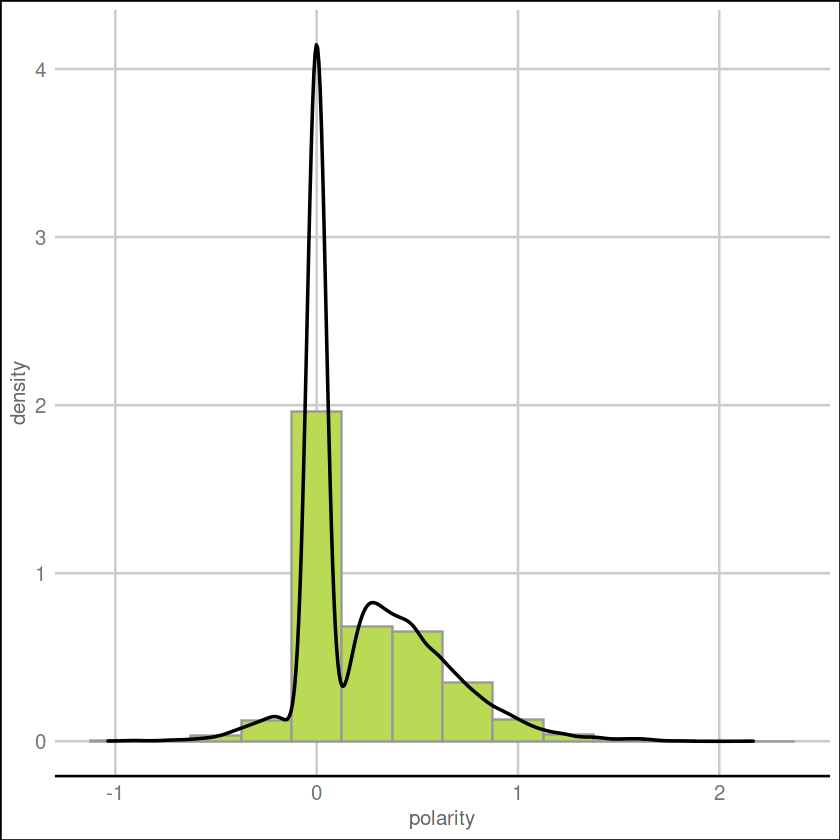

In [4]:
# Practicing applying polarity to the text column
tweets_pol <- polarity(Badminton_tweets$text)

# Reviewing the object above
tweets_pol

# Checking out the tweet's polarity
summary(tweets_pol$all$polarity)


# Plotting the Badminton's tweet polarity; kernal density plot     
ggplot(tweets_pol$all, aes(x = polarity, y = ..density..)) + 
  geom_histogram(binwidth = 0.25, fill = "#bada55", colour = "grey60") +
  geom_density(size = 0.75) +
  theme_gdocs() 

# 3 & 4. Pre-processing text & Extracting features about the text.

#### Creating Polarity Based Corpora

In [5]:
# Getting positive texts
positive_terms <- Badminton_tweets  %>%
  # Adding polarity column
  mutate(polarity = tweets_pol$all$polarity) %>%
  # Filtering for positive polarity
  filter(polarity > 0) %>%
  # Extracting text column
  pull(text) %>% 
  # Pasting and collapsing
  paste(collapse = " ")

# Getting negative texts
negative_terms <- Badminton_tweets %>%
  # Adding polarity column
  mutate(polarity = tweets_pol$all$polarity) %>%
  # Filtering for negative polarity
  filter(polarity < 0) %>%
  # Extracting text column
  pull(text) %>%
  # Pasting and collapsing
  paste(collapse = " ")

# Concatenating the terms
all_corpus <- c(positive_terms, negative_terms) %>% 
  # Sourcing from a vector
  VectorSource() %>% 
  # Creating a volatile corpus
  VCorpus()

all_tdm <- TermDocumentMatrix(
  # Using all_corpus
  all_corpus, 
  control = list(
    # Using TFIDF weighting
    weighting = weightTfIdf, 
    # Removing the punctuation
    removePunctuation = TRUE,
    # Using English stopwords
    stopwords = stopwords(kind = "en")
  )
)

# Examining the TDM
all_tdm



<<TermDocumentMatrix (terms: 9476, documents: 2)>>
Non-/sparse entries: 7985/10967
Sparsity           : 58%
Maximal term length: 48
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

#### Creating a Tidy Text Tibble

In [6]:
#Dropping all the columns except the id and text column
Badminton_tweets <- Badminton_tweets[, -c(3:15)]

# Vector to tibble
tidy_tweets <- Badminton_tweets %>% 
  unnest_tokens(word, text)

# Group by and mutate
tidy_tweets <- tidy_tweets %>% 
  group_by(id) %>% 
  mutate(original_word_order = seq_along(word)) # Sometimes it is useful to capture the original word order within each group of a corpus. 

# Quick tweets
head(tidy_tweets, n = 5)

# Loading stopwords
data("stop_words")

# Performing anti-join
tidy_tweets_without_stopwords <- tidy_tweets %>% 
  anti_join(stop_words)

id,word,original_word_order
<dbl>,<chr>,<int>
1.529235e+18,india,1
1.529235e+18,has,2
1.529235e+18,won,3
1.529235e+18,the,4
1.529235e+18,thomas,5


Joining, by = "word"


#### Comparing Tidy Sentiment to Qdap Polarity

In [7]:
# Getting the  lexicon
bing <- get_sentiments("bing")

# Calculating polarity for each review
pos_neg <- tidy_tweets_without_stopwords %>% 
  inner_join(bing) %>%
  count(sentiment) %>%
  spread(sentiment, n, fill = 0) %>% 
  mutate(polarity = positive - negative)

# Checking outcome
summary(pos_neg)

Joining, by = "word"


       id               negative         positive        polarity     
 Min.   :1.485e+18   Min.   :0.0000   Min.   :0.000   Min.   :-6.000  
 1st Qu.:1.526e+18   1st Qu.:0.0000   1st Qu.:1.000   1st Qu.: 1.000  
 Median :1.526e+18   Median :0.0000   Median :1.000   Median : 1.000  
 Mean   :1.526e+18   Mean   :0.2377   Mean   :1.794   Mean   : 1.557  
 3rd Qu.:1.526e+18   3rd Qu.:0.0000   3rd Qu.:2.000   3rd Qu.: 2.000  
 Max.   :1.538e+18   Max.   :6.0000   Max.   :9.000   Max.   : 9.000  

# 5. Analyzing; visualizing

#### Relationship between author's effort and sentiment

Often writer will use more words when they are more passionate. For example, a mad airline passenger will leave a longer review the worse (the perceived) service. Conversely a less impassioned passenger may not feel compelled to spend a lot of time writing a review. Lengthy reviews may inflate overall sentiment since the reviews will inherently contain more positive or negative language as the review lengthens. Let's try to examine effort and sentiment.

In [8]:
pos_neg_pol <- tidy_tweets_without_stopwords %>% 
  # Effort is measured as count by id
  count(id) %>% 
  # Inner join to pos_neg
  inner_join(pos_neg) %>% 
  # Adding polarity status
  mutate(pol = ifelse(polarity >= 0, "Positive", "Negative"))

# Examining results
head(pos_neg_pol, n = 5)

Joining, by = "id"


id,n,negative,positive,polarity,pol
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1.485193e+18,46,0,1,1,Positive
1.502463e+18,23,0,1,1,Positive
1.505587e+18,13,0,2,2,Positive
1.508685e+18,29,0,1,1,Positive
1.509817e+18,14,1,0,-1,Negative


`geom_smooth()` using formula 'y ~ x'



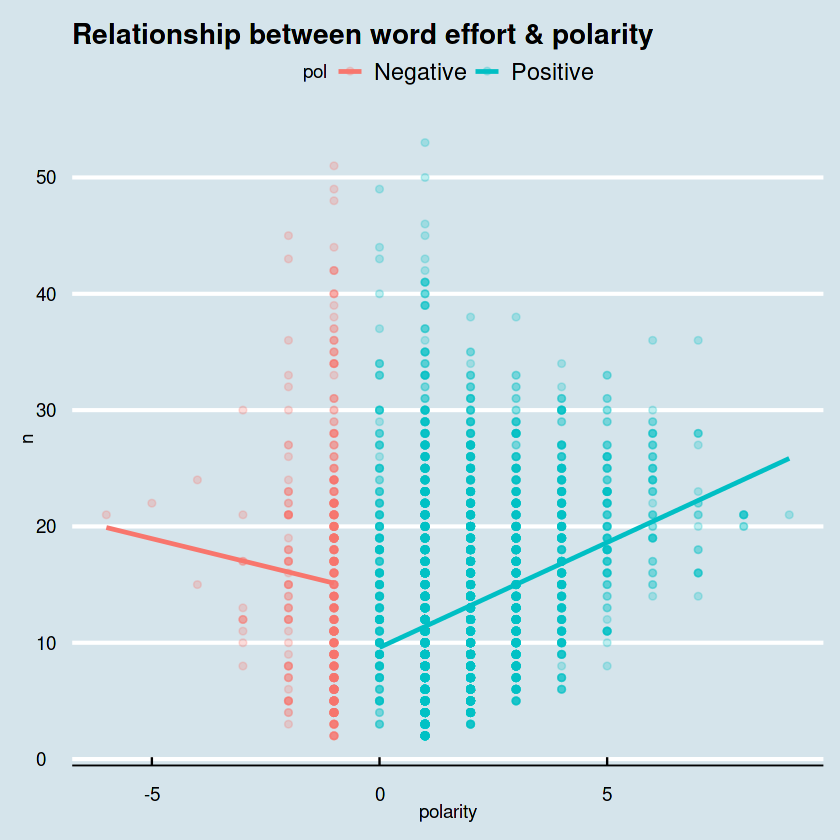

In [9]:
# Plotting n vs. polarity, colored by pol
ggplot(pos_neg_pol, aes(polarity, n, color = pol)) + 
  # Adding point layer
  geom_point(alpha = 0.25) +
  # Adding smooth layer
  geom_smooth(method = "lm", se = FALSE) +
  theme_gdocs() +
  ggtitle("Relationship between word effort & polarity") + theme_economist()

### Comparison Cloud

In [10]:
# Matrix
all_tdm_m <- as.matrix(all_tdm)

# Column names
colnames(all_tdm_m) <- c("positive", "negative")

# Top pos words
order_by_pos <- order(all_tdm_m[, 1], decreasing = TRUE)

# Review top 10 pos words
all_tdm_m[order_by_pos, ] %>% head(n = 10)

# Top neg words
order_by_neg <- order(all_tdm_m[, 2], decreasing = TRUE)

# Review top 10 neg words
all_tdm_m[order_by_neg, ] %>% head(n =10)

,positive,negative
wins,0.0049783792,0
champion,0.0045316015,0
amazing,0.0015477653,0
kudos,0.0015318090,0
medal,0.0013722455,0
entire,0.0012126821,0
badmintonindia,0.0011648131,0
defeated,0.0011329004,0
scripted,0.0010212060,0
bow,0.0009573806,0


,positive,negative
jam,0,0.002724383
stress,0,0.001664901
din,0,0.001513546
nervous,0,0.001513546
vikramtrailer,0,0.001362192
buddhapurnima,0,0.001210837
realknowledgeofbuddhism,0,0.001210837
strategy,0,0.001210837
delay,0,0.001059482
foolinstead,0,0.001059482


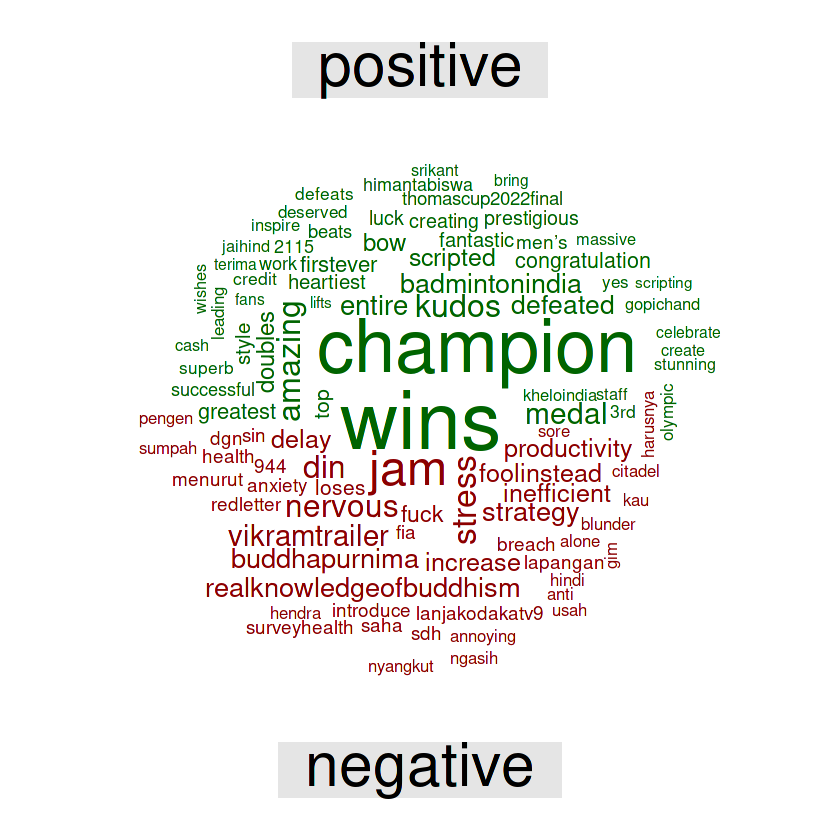

In [11]:
comparison.cloud(
  # Use the term-document matrix
  all_tdm_m,
  # Limit to 20 words
  max.words = 100,
  colors = c("darkgreen","darkred")
)

#### There is still room for improvements.

